<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movies Dataset </p>
<br>This notebook uses a dataset from Kaggle. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset** from the course website. 

You can find the data at https://junyounglim.github.io/. Please unzip the file at a filepath of your choice. 

Here are instructions on how to unzip a file in Windows: https://support.microsoft.com/en-us/help/14200/windows-compress-uncompress-zip-files. 
For Macs, simply double-click on the file. 

In [79]:
# import pandas and load data
import pandas as pd

movies = pd.read_csv('tmdb_5000_movies.csv')
list(movies)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [80]:
movies.drop(['homepage','id','keywords','original_language','original_title','overview','production_companies','production_countries','runtime','spoken_languages','status','tagline','title'], axis=1, inplace=True)

import re
def to_list(strng):
    return [item for index, item in enumerate(strng.split('"')) if (index + 1) % 6 == 0]
movies['genres'] = movies['genres'].apply(to_list)

movies['release_date'] = pd.to_datetime(movies['release_date']).dt.year
movies.dropna(inplace=True)

movies.head(5)

,budget,genres,popularity,release_date,revenue,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2009.0,2787965087,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",139.082615,2007.0,961000000,6.9,4500
2,245000000,"[Action, Adventure, Crime]",107.376788,2015.0,880674609,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,2012.0,1084939099,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,2012.0,284139100,6.1,2124


In [81]:
movie_dummies = movies.genres.str.join('|').str.get_dummies().add_prefix('genre_')
movies.drop(['genres'], axis=1, inplace=True)
movies = movies.join(movie_dummies)
movies.head(5)

,budget,popularity,release_date,revenue,vote_average,vote_count,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,237000000,150.437577,2009.0,2787965087,7.2,11800,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,300000000,139.082615,2007.0,961000000,6.9,4500,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,107.376788,2015.0,880674609,6.3,4466,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,112.312950,2012.0,1084939099,7.6,9106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,260000000,43.926995,2012.0,284139100,6.1,2124,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


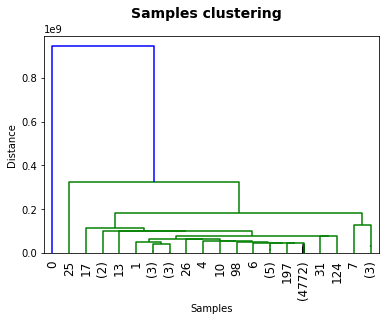

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

data_dist = pdist(movies) # computing the distance
data_link = linkage(data_dist) # computing the linkage

dendrogram(data_link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);
plt.show()